### Bool mask and bool indexing

In [1]:
import pandas as pd
import numpy as np

In [3]:
floats = pd.DataFrame(np.random.randn(7, 4), columns=["A", "B", "C", "D"])
floats

,A,B,C,D
0,0.274798,0.211131,-1.870548,2.013291
1,0.279512,0.321168,0.961400,1.127130
2,-0.517818,-0.288792,-0.769826,-0.051745
3,0.968052,-0.284882,-0.179317,-1.259150
4,-0.915414,0.894818,-0.809295,1.139314
5,0.572786,-0.438105,1.114085,0.169390
6,-0.573839,-1.437120,2.226377,0.709754


In [12]:
# Createing bool mask for column "B"
floats["B"] >= 0

# Selecting all rowswhere "B" >= 0
floats[floats["B"] >= 0]

# Creating bool mask for row "0"
floats.loc[0, :] >= 0

# Selecting all columns where "0" >= 0
floats.loc[:, floats.loc[0, :] >= 0]

,A,B,D
0,0.274798,0.211131,2.013291
1,0.279512,0.321168,1.127130
2,-0.517818,-0.288792,-0.051745
3,0.968052,-0.284882,-1.259150
4,-0.915414,0.894818,1.139314
5,0.572786,-0.438105,0.169390
6,-0.573839,-1.437120,0.709754


## Querying data
Filtering rows based on values of certain attributes can be done either with bool index or pandas query method.

In [15]:
autos = pd.read_json("../Data/autos.json")
autos.head(3)

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
2,std,hatchback,2.68,19,9.0,2823,rwd,front,152,ohcv,...,alfa-romero,NaN,six,two,5000.0,16500.0,3.47,1,94.5,65.5


In [39]:
autos[autos["make"] == "volvo"]
autos.query("make == 'volvo'")

autos[autos["engine-size"] <= 140]
autos.query("`engine-size` <= 140")

autos[(autos["make"] == "volvo") & (autos["engine-size"] <= 140)] # Volvo cars with engine size <= 140
autos[(autos["make"] == "volvo") | (autos["engine-size"] <= 140)] # Cars with engine size <= 140 and ALL volvo cars

autos.query("make == 'volvo' and `engine-size` <= 140")
autos.query("make == 'volvo' or `engine-size` <= 140")

autocopy = autos.copy()
autocopy.loc[(autos["make"] == "volvo") & (autos["engine-size"] <= 140), ["price"]] = 0
autocopy.tail(10)

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
195,std,wagon,3.78,23,9.5,3034,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,13415.0,3.15,-1,104.3,67.2
196,std,sedan,3.78,24,9.5,2935,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,15985.0,3.15,-2,104.3,67.2
197,std,wagon,3.78,24,9.5,3042,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,16515.0,3.15,-1,104.3,67.2
198,turbo,sedan,3.62,17,7.5,3045,rwd,front,130,ohc,...,volvo,103.0,four,four,5100.0,0.0,3.15,-2,104.3,67.2
199,turbo,wagon,3.62,17,7.5,3157,rwd,front,130,ohc,...,volvo,74.0,four,four,5100.0,0.0,3.15,-1,104.3,67.2
200,std,sedan,3.78,23,9.5,2952,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,16845.0,3.15,-1,109.1,68.9
201,turbo,sedan,3.78,19,8.7,3049,rwd,front,141,ohc,...,volvo,95.0,four,four,5300.0,19045.0,3.15,-1,109.1,68.8
202,std,sedan,3.58,18,8.8,3012,rwd,front,173,ohcv,...,volvo,95.0,six,four,5500.0,21485.0,2.87,-1,109.1,68.9
203,turbo,sedan,3.01,26,23.0,3217,rwd,front,145,ohc,...,volvo,95.0,six,four,4800.0,22470.0,3.40,-1,109.1,68.9
204,turbo,sedan,3.78,19,9.5,3062,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,22625.0,3.15,-1,109.1,68.9


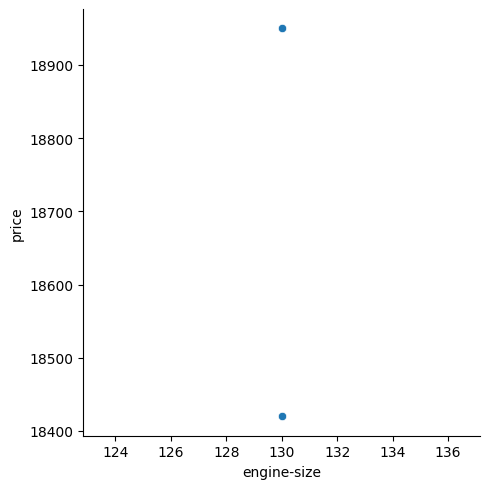

In [31]:
import seaborn as sns

sns.relplot(x="engine-size", y="price", data=autos.query("make == 'volvo' and `engine-size` <= 140"))

## Sorting dataframe
Dataframes can be sorted using the .sort_values() method

Paramets:
- **by** Column, or list of columns
- **ascending** Option. Default=True

In [45]:
autos.sort_values(by=["make", "engine-size"], ascending=[False, True])

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
198,turbo,sedan,3.62,17,7.5,3045,rwd,front,130,ohc,...,volvo,103.0,four,four,5100.0,18420.0,3.15,-2,104.3,67.2
199,turbo,wagon,3.62,17,7.5,3157,rwd,front,130,ohc,...,volvo,74.0,four,four,5100.0,18950.0,3.15,-1,104.3,67.2
194,std,sedan,3.78,23,9.5,2912,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,12940.0,3.15,-2,104.3,67.2
195,std,wagon,3.78,23,9.5,3034,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,13415.0,3.15,-1,104.3,67.2
196,std,sedan,3.78,24,9.5,2935,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,15985.0,3.15,-2,104.3,67.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,std,sedan,3.19,19,8.5,2844,fwd,front,136,ohc,...,audi,158.0,five,four,5500.0,17710.0,3.40,1,105.8,71.4
7,std,wagon,3.19,19,8.5,2954,fwd,front,136,ohc,...,audi,NaN,five,four,5500.0,18920.0,3.40,1,105.8,71.4
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
